**In Class Activity 2**

Submitted by : Group 2


| Name | Student ID |
| --- | --- |
| Rajan Ghimire (Group Leader) | C0924991 |
| Aarjeyan Shrestha | C0927422 |
| Sudip Chaudhary | C0922310 |



Goal : predict ```mean_price``` of data from July 30, 2021 

Evaluation Report: 

- ```Mean Squared Error``` with selected features: 5.886340935646672e-07 
- ```R^2 Score``` with selected features: 0.9999994079366759 
- ```Explained Variance``` Score: 0.9999994079446246
- ```Mean Absolute Percentage Error```: 0.07859020352974869



<br>

Steps: 
![](img.jpeg)

In [18]:
# importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataframe.
df = pd.read_csv("data.csv",delimiter=",",encoding="utf-8")

# print 3 rows of dataframe
df.head(3)

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
# dataframe tail visualization 
df.tail(3)

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.14831,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.14831,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973
221045,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00640000,12/15/2023,640.0,P,A,216.50,...,0.14831,0,0,430.26,*,-0.931634,0.672488,0.000997,-0.010467,-15.169052


### Data Acquisition & Filtering


**Dynamically renaming all the column names.**

In [4]:
updated_names = []

for name in df.columns:
    
    splitted_name = name.lower().split(" ")

    updated_names.append("_".join(splitted_name))


df.columns = updated_names

df.head()

,symbol,exchange,date,adjusted_close,option_symbol,expiration,strike,call/put,style,ask,...,iv,volume,open_interest,stock_price_for_iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


**Identifiying the categorical and non categorical features of the dataset.**

In [5]:
# Step 1: Get the object type of non categorical varibale.
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {cat_columns}")

# Step 2: Get all numeric data types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(f"Numerical columns: {numerical_cols}")


print(f"Total Columns in datase: {df.shape[1]}")
print(f"Identified data type: {len(cat_columns) + len(numerical_cols)}")

assert df.shape[1] == len(cat_columns) + len(numerical_cols) , "Some columns not indentified."

Categorical columns: ['symbol', 'exchange', 'date', 'option_symbol', 'expiration', 'call/put', 'style', '*']
Numerical columns: ['adjusted_close', 'strike', 'ask', 'bid', 'mean_price', 'iv', 'volume', 'open_interest', 'stock_price_for_iv', 'delta', 'vega', 'gamma', 'theta', 'rho']
Total Columns in datase: 22
Identified data type: 22


**Check if dataset has null values**

In [6]:
df.isna().sum() 

symbol                     0
exchange                   0
date                       0
adjusted_close             0
option_symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean_price                 0
iv                         0
volume                     0
open_interest              0
stock_price_for_iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

**As we can see that the * column has a lot of missing values, we deciced to simply drop the column.**

In [7]:
cat_columns.remove('*')
df.drop(['*'],axis=1, inplace=True)
print(f"Total observations in data is {df.shape[0]} and total features in dataset is {df.shape[1]}")

Total observations in data is 221046 and total features in dataset is 21


### Data Extraction

**Here we convert all the categorical data into a numerical representation and other necessary converstion and feature scaling**

In [8]:
# Convert date columns to datetime objects
df['date'] = pd.to_datetime(df['date'])

df['expiration'] = pd.to_datetime(df['expiration'])


In [9]:
from sklearn.preprocessing import StandardScaler

# Scaling all the numerical values
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


from sklearn.preprocessing import LabelEncoder

# performing label encdoing for all categorical variables
label_encoder = LabelEncoder()

for column in cat_columns:
    if column != "date":
        df[column] = label_encoder.fit_transform(df[column])


### Data Validation and Cleansing

**Using box and whisker plot to check if there are any outliers in the data.**

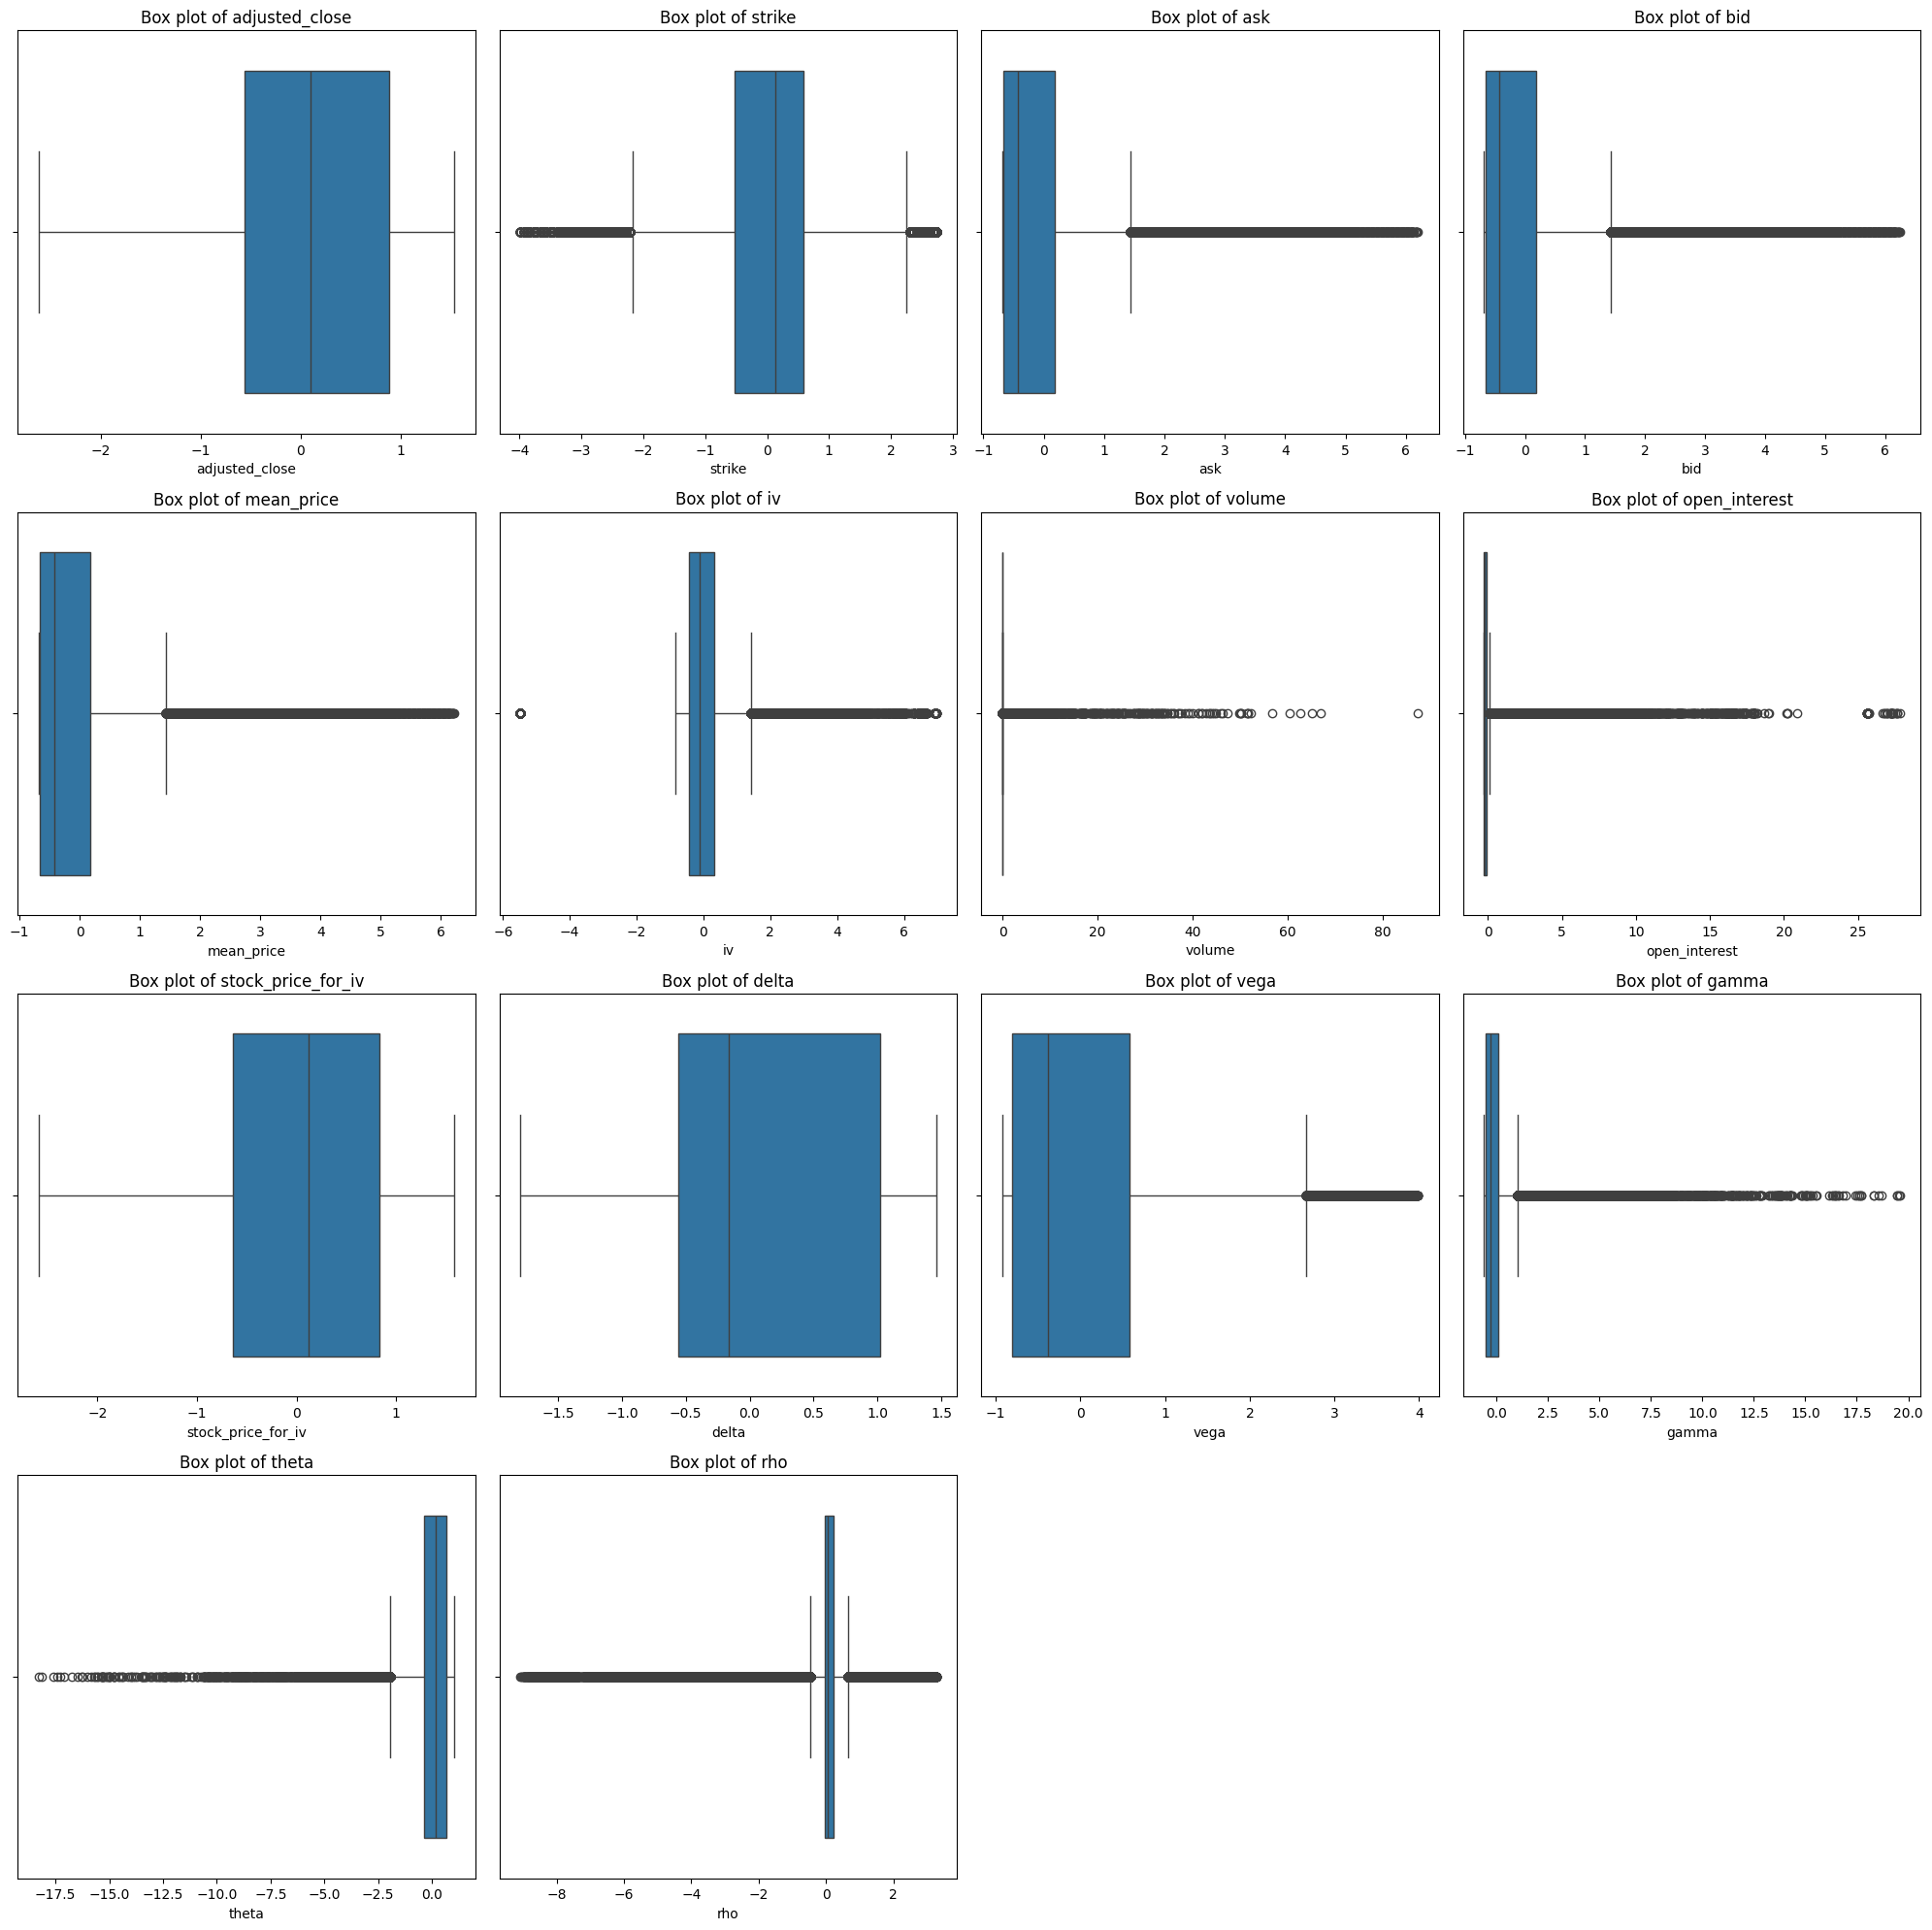

In [10]:
# Number of images in a column
n_cols = 4
#  required number of rows
n_rows = 4  

# Create a subplot grid
plt.figure(figsize=(20,20))  # Adjust figure size as needed

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Data Aggregation & Representation

**Performing time series analysis of the numerical varibales**

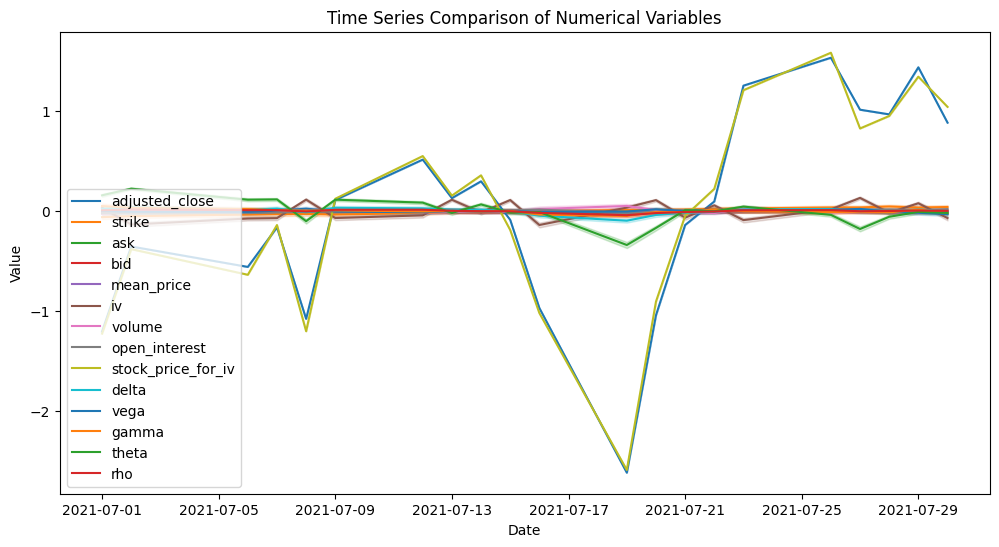

In [11]:
# copying the main df into a plotting dataframe
plot_df = df.copy()

# setting date as an index
plot_df.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))

for col in numerical_cols:
    sns.lineplot(data=plot_df, x=plot_df.index, y=col, label=col)

plt.title('Time Series Comparison of Numerical Variables')
plt.ylabel('Value')
plt.xlabel('Date')
plt.legend()
plt.show()

**Performing the co-relation check between the numerical values only**

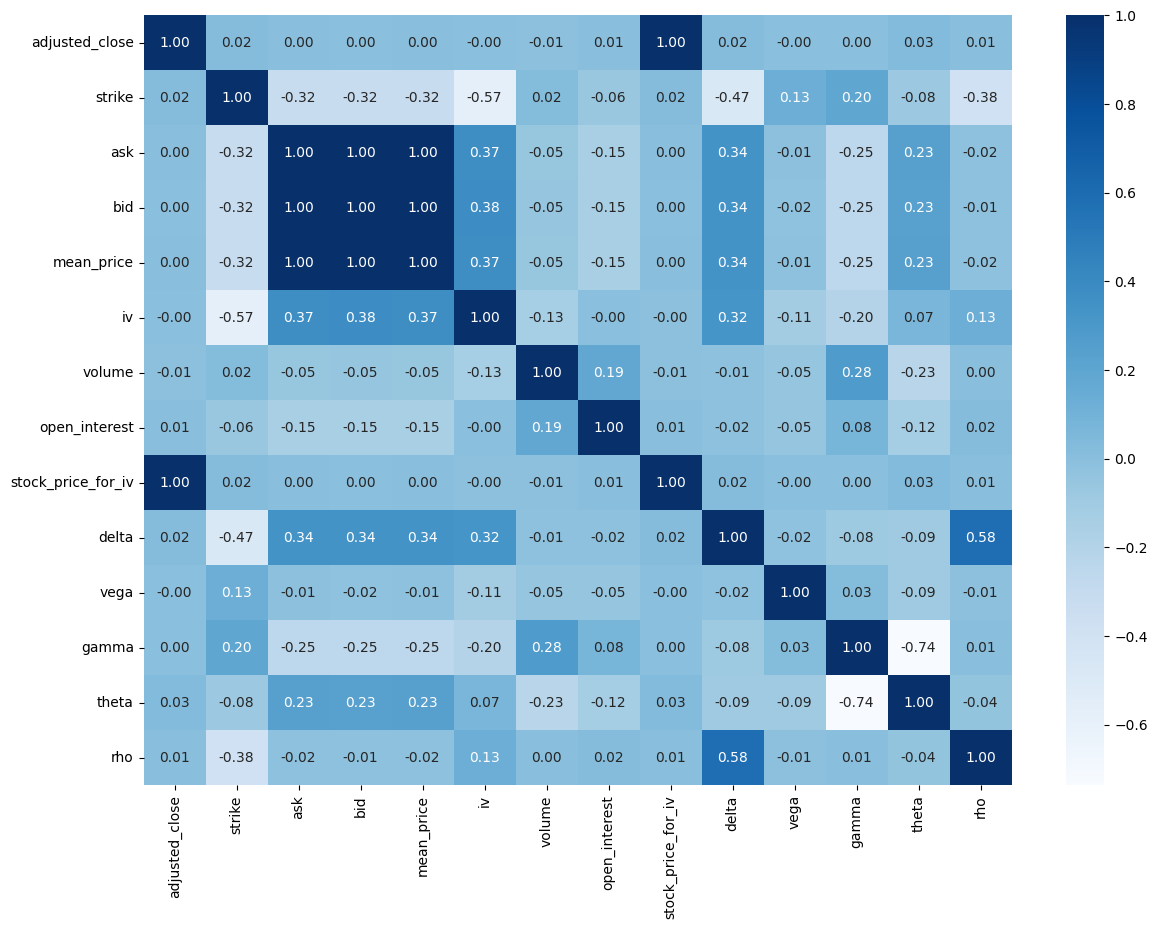

In [12]:
# isolating the dataframe with numerical values only
df_numerical = df.loc[:,numerical_cols]

plt.figure(figsize=(14, 10))
sns.heatmap(df_numerical.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.show()

###  Feature Engineering

In [13]:
# Selecting the features
# input features 
input_features = df.columns.to_list()
input_features.remove("mean_price")
input_features.remove("date")


# target feature
target = "mean_price"


In [14]:
# Split data into training and testing sets
train_df = df[df['date'] < '2021-07-30']

# as mentioned in question, we can use date 2021-07-30 for validation.
test_df = df[df['date'] == '2021-07-30']

X_train = train_df[input_features]
y_train = train_df[target]
X_test = test_df[input_features]
y_test = test_df[target]

As we are unware of at this moment which feature to select, we opted for ```RandomForestRegressor``` that will help us to rank all the features. 
And, based on the features we can select top ```N``` features.

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the random forest Regressor
rf.fit(X_train, y_train)

# now listing all the important features
feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
sorting_features_names = np.argsort(feature_importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for idx in sorting_features_names:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")


Feature ranking:
bid: 0.610228089614493
ask: 0.3897713037534132
rho: 8.108563456472492e-08
adjusted_close: 7.846946269483399e-08
stock_price_for_iv: 6.597509427678284e-08
iv: 5.2896130011201535e-08
gamma: 5.1995315397130816e-08
theta: 4.927900369952958e-08
delta: 4.828106204050879e-08
vega: 4.35309086387376e-08
option_symbol: 4.045813960359499e-08
strike: 3.7389850297165705e-08
open_interest: 2.448439185715494e-08
expiration: 2.1732145034632208e-08
volume: 7.065362085778561e-09
call/put: 3.989593604748803e-09
style: 0.0
exchange: 0.0
symbol: 0.0


### Model Building

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score

# From the N features listed by the random forest regressor, we can choose 'N' features, for this example 
# We are using 6 Features 

N = 6

top_features = []
for i in sorting_features_names[:N]:

    top_features.append(feature_names[i])


# Lets update train and test data based on the top features
X_train_feature_selected = X_train[top_features]
X_test_feature_selected = X_test[top_features]

# Train a regression model 
model = LinearRegression()
model.fit(X_train_feature_selected, y_train)


predictions = model.predict(X_test_feature_selected)


**Evaluation**

In [17]:
# Evaluate the new model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error with selected features:", mse)
print("R^2 Score with selected features:", r2)

evs = explained_variance_score(y_test, predictions)
print("Explained Variance Score:", evs)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)




Mean Squared Error with selected features: 5.886340935646672e-07
R^2 Score with selected features: 0.9999994079366759
Explained Variance Score: 0.9999994079446246
Mean Absolute Percentage Error: 0.07859020352974869
